In [1]:
import graphlab

In [2]:
sales = graphlab.SFrame.read_csv('../courseware/Philadelphia_Crime_Rate_noNA.csv')

[INFO] 1449373484 : INFO:     (initialize_globals_from_environment:282): Setting configuration variable GRAPHLAB_FILEIO_ALTERNATIVE_SSL_CERT_FILE to /Users/lex/.graphlab/anaconda/lib/python2.7/site-packages/certifi/cacert.pem
1449373484 : INFO:     (initialize_globals_from_environment:282): Setting configuration variable GRAPHLAB_FILEIO_ALTERNATIVE_SSL_CERT_DIR to 
This non-commercial license of GraphLab Create is assigned to lextoumbourou@gmail.com and will expire on September 22, 2016. For commercial licensing options, visit https://dato.com/buy/.

[INFO] Start server at: ipc:///tmp/graphlab_server-36742 - Server binary: /Users/lex/.graphlab/anaconda/lib/python2.7/site-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1449373484.log
[INFO] GraphLab Server Version: 1.7.1


PROGRESS: Finished parsing file /Users/lex/code/study-notes/moocs/coursera/ml-regression/courseware/Philadelphia_Crime_Rate_noNA.csv
PROGRESS: Parsing completed. Parsed 99 lines in 0.028115 secs.
------------------------------------------------------
Inferred types from first line of file as 
column_type_hints=[int,float,float,float,float,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------
PROGRESS: Finished parsing file /Users/lex/code/study-notes/moocs/coursera/ml-regression/courseware/Philadelphia_Crime_Rate_noNA.csv
PROGRESS: Parsing completed. Parsed 99 lines in 0.009355 secs.


In [3]:
sales

HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
124186,12.4186,19.5,25.0,8.0,Aston,Delaware
110490,11.049,49.4,25.0,2.7,Bensalem,Bucks
79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks
92634,9.2634,48.6,20.0,0.6,Bristol T.,Bucks
89246,8.9246,30.8,15.0,-2.6,Brookhaven,Delaware
195145,19.5145,10.8,20.0,-3.5,Bryn Athyn,Montgome
297342,29.7342,20.2,14.0,0.6,Bryn Mawr,Montgome
264298,26.4298,20.4,26.0,6.0,Buckingham,Bucks


## Exploring the data

House price in a town is correlated with the crime rate of that town. Low crime towns tend to be associated with higher house prices and vice versa.

In [6]:
graphlab.canvas.set_target('ipynb')
sales.show(view="Scatter Plot", x="CrimeRate", y="HousePrice")

## Fit the regression model using crime as the feature

In [18]:
crime_model = graphlab.linear_regression.create(sales, target='HousePrice', features=['CrimeRate'], validation_set=None, verbose=False)

## Viewing fit of the data

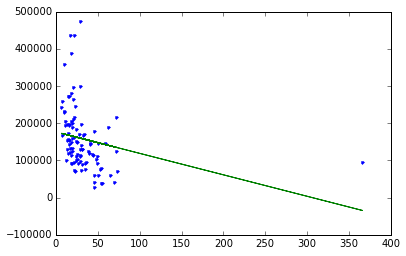

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(sales['CrimeRate'],sales['HousePrice'],'.',
         sales['CrimeRate'],crime_model.predict(sales),'-')

(blue dots = original value, green line = fit from simple regression)

## Remove center city and redo the analysis

Center City is an observation with very high crime rate, but housing prices are not very low. The point is an outlier. After removing it:

In [10]:
sales_no_cc = sales[sales['MilesPhila'] != 0.0]

In [11]:
sales_no_cc.show(view="Scatter Plot", x="CrimeRate", y="HousePrice")

## Refit the line

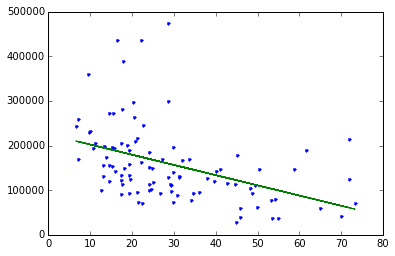

In [17]:
crime_model_no_cc = graphlab.linear_regression.create(sales_no_cc, target='HousePrice', features=['CrimeRate'], validation_set=None, verbose=False)
plt.plot(sales_no_cc['CrimeRate'],sales_no_cc['HousePrice'],'.',
         sales_no_cc['CrimeRate'],crime_model.predict(sales_no_cc),'-')

In [15]:
## Compare coefficients for full-data fit verses no-center-city fit

In [21]:
crime_model.get('coefficients')

name,index,value
(intercept),None,176626.046881
CrimeRate,None,-576.804949058


In [20]:
crime_model_no_cc.get('coefficients')

name,index,value
(intercept),None,225204.604303
CrimeRate,None,-2287.69717443


## High leverage points

Extreme x values whre there are no other observations. Point has the *potential* to dramatically change the least squares line. Though, if it follows the trend of the rest of the data, it might not have much impact.

## Influential observations

A datapoint that if removed, will give a very different fit.

## Remove high-value outlier neighborhoods and redo anaylsis

In [26]:
sales_nohighend = sales_no_cc[sales_no_cc['HousePrice'] < 350000]
crime_model_no_highend = graphlab.linear_regression.create(
    sales_nohighend, target='HousePrice', features=['CrimeRate'], validation_set=None, verbose=False)

## Do the coefficients change much?

In [27]:
crime_model_no_cc.get('coefficients')

name,index,value
(intercept),None,225204.604303
CrimeRate,None,-2287.69717443


In [28]:
crime_model_no_highend.get('coefficients')

name,index,value
(intercept),None,199073.589615
CrimeRate,None,-1837.71280989
